# Email Spam Detection with Machine Learning Algorithms 
By Shuyan Liu sl10158@nyu.edu

## Introduction

Email spam remains one of the most significant and persistent challenges in digital communication, affecting productivity, security, and user experience. With the advent of more sophisticated spamming techniques, traditional spam filters, which often rely on static rule-based systems, struggle to keep pace. In response to this evolving threat, my project utilizes advanced machine learning algorithms to develop a dynamic and robust spam detection system. This paper outlines the design, implementation, and evaluation of our machine learning model that aims to identify and filter spam emails with heightened accuracy and efficiency. By integrating a combination of natural language processing and supervised learning techniques, we seek to create a system that not only detects known spam traits but also adapts to new spamming methods as they emerge. This report details the datasets used, preprocessing method, model selection, training methodologies, and the performance metrics of our proposed solution.

## Datasets Used

##### Trec 2006 Spam data (53,668 emails, 29,923 ham, 23,745 spam)
##### Trec 2007 Spam data (17,309 emails, 12,508 ham, 4,801 spam)
##### Spam Email dataset 3 from Kaggle (5,127 emails, 2,259 ham, 2,868 spam)

## Data Preprocesing

In this project, I implemented a series of data preprocessing steps to prepare textual data for subsequent analysis. These steps are crucial for reducing the noise in the data and enhancing the performance of the machine learning models.

### 1. Lowercasing
All text was converted to lowercase to ensure uniformity, thus reducing the complexity of the data and the computational resources required for processing.

### 2. Removal of Email Subject Prefix
I removed specific prefixes (e.g., 'subject:') from the text to eliminate redundant information that could bias the results.

### 3. Number Replacement
All numeric values were replaced with the placeholder 'escapenumber'. This step helps in generalizing the model’s understanding of numerical data without losing the context provided by the presence of numbers.

### 4. Tokenization
The text was tokenized into individual words using NLTK’s tokenizer. Tokenization is fundamental in text processing to convert strings into manageable units for analysis.

### 5. Filtering Non-Alphanumeric Characters
I filtered out tokens that were not alphanumeric, removing special characters that do not contribute to the semantic meaning of the text.

### 6. Stopwords and Punctuation Removal
Commonly used words in English that carry minimal meaningful information (stopwords) and all punctuation were removed. This step helps focus the analysis on significant words.

### 7. Stemming
I applied the Porter Stemming algorithm to reduce words to their base or root form. Stemming helps in reducing the complexity of the text and improving the model’s performance by consolidating similar forms of a word.

By applying these preprocessing steps, I effectively standardized the text data, enhancing the efficacy of the natural language processing tasks. These methods are designed to support my goal of developing a robust model capable of understanding and processing human language efficiently.


## Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df_trec_2007 = pd.read_csv('/Users/shuyan/Desktop/MASY 4100 Capstone/Code/Data/email_text.csv')
df_trec_2007

,label,text
0,1,do you feel the pressure to perform and not ri...
1,0,hi i've just updated from the gulus and i chec...
2,1,mega authenticv i a g r a discount pricec i a ...
3,1,hey billy it was really fun going out the othe...
4,1,system of the home it will have the capabiliti...
...,...,...
53663,1,versuchen sie unser produkt und sie werden fuh...
53664,1,while we may have high expectations of our ass...
53665,0,for those who are interested i just cook a lit...
53666,0,hello as i wrote i call sqlfetch channel t stu...


In [8]:
# Check for missing values
print(df_trec_2007.isnull().sum())

label    0
text     0
dtype: int64


In [9]:
#check duplicate values
df_trec_2007.duplicated().sum()

0

In [10]:
# Count the number of spam and not-spam texts
print(df_trec_2007['label'].value_counts())

label
1    29923
0    23745
Name: count, dtype: int64


<Axes: xlabel='label_str', ylabel='Density'>

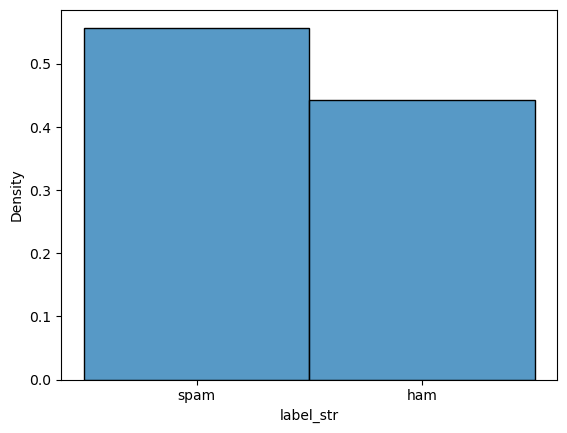

In [12]:
labeled_df = df_trec_2007.copy()
labeled_df['label_str'] = labeled_df['label'].map({0: 'ham', 1: 'spam'})
sns.histplot(labeled_df, x='label_str' , discrete=True, stat='density')

In [15]:
# Importing NLTK for natural language processing
import nltk
from nltk.corpus import stopwords    # For stopwords


# Downloading NLTK data
nltk.download('stopwords')   # Downloading stopwords data
nltk.download('punkt')       # Downloading tokenizer data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shuyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/shuyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
# function for preprocessing

import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize

# Initialize Porter Stemmer
ps = PorterStemmer()

def transform_text(text):
    
    # Lower case
    text = text.lower()
    # Optional: remove subject, specifically for this df
    text = text.replace('subject:', '')
    # Replace numbers with 'escapenumber'
    text = re.sub(r'\d+', 'escapenumber', text)
    
    # Tokenization
    text = word_tokenize(text)
    
    # Remove special characters and keep alphanumeric
    text = [word for word in text if word.isalnum()]
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))  # Initialize stop words set
    text = [word for word in text if word not in stop_words and word not in string.punctuation]
    
    # Stemming
    text = [ps.stem(word) for word in text]
    
    # Return the cleaned text
    return " ".join(text)


In [18]:
#text the function
print(f'Original: {df_trec_2007.iloc[0,1]}. \nCleaned: {transform_text(df_trec_2007.iloc[0,1])}')


Original: do you feel the pressure to perform and not rising to the occasion try v ia gr a your anxiety will be a thing of the past and you will be back to your old self . 
Cleaned: feel pressur perform rise occas tri v ia gr anxieti thing past back old self


In [20]:
# New column for cleaned text
df_trec_2007['transformed_text'] = df_trec_2007['text'].apply(transform_text)
df_trec_2007

,label,text,transformed_text
0,1,do you feel the pressure to perform and not ri...,feel pressur perform rise occas tri v ia gr an...
1,0,hi i've just updated from the gulus and i chec...,hi updat gulu check mirror seem littl typo deb...
2,1,mega authenticv i a g r a discount pricec i a ...,mega authenticv g r discount pricec l discount...
3,1,hey billy it was really fun going out the othe...,hey billi realli fun go night talk said felt i...
4,1,system of the home it will have the capabiliti...,system home capabl link far know within part r...
...,...,...,...
53663,1,versuchen sie unser produkt und sie werden fuh...,versuchen sie unser produkt und sie werden fuh...
53664,1,while we may have high expectations of our ass...,may high expect associ also give high reward i...
53665,0,for those who are interested i just cook a lit...,interest cook littl tcltkhelp function eas acc...
53666,0,hello as i wrote i call sqlfetch channel t stu...,hello wrote call sqlfetch channel studi functi...


In [22]:
# Top 30 words of spam
spam_corpus = []
for sentence in df_trec_2007[df_trec_2007['label'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_corpus.append(word)

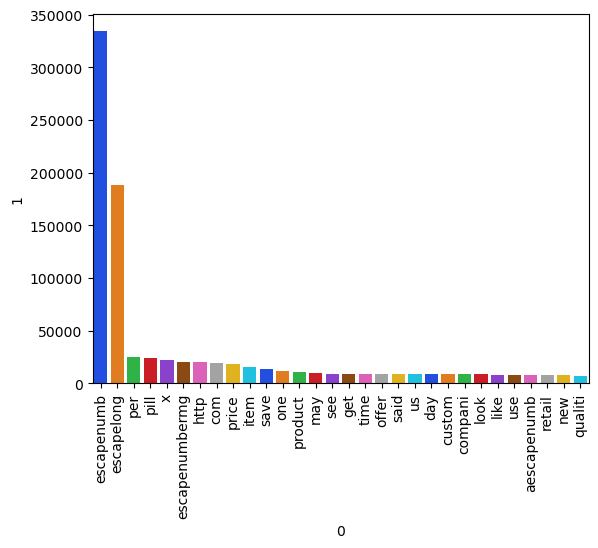

In [23]:
from collections import Counter
filter_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(data = filter_df, x = filter_df[0], y = filter_df[1], palette = 'bright')
plt.xticks(rotation = 90)
plt.show()

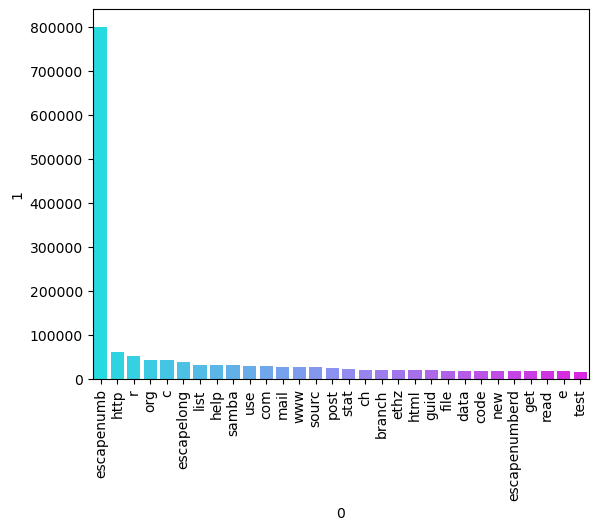

In [25]:
ham_corpus = []
for sentence in df_trec_2007[df_trec_2007['label'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_corpus.append(word)
filter_ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(data = filter_ham_df, x = filter_ham_df[0], y = filter_ham_df[1], palette = 'cool')
plt.xticks(rotation = 90)
plt.show()

## Model Building

### Initializing CountVectorizer and TfidfVectorizer

In [27]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfid = TfidfVectorizer(max_features = 3000)

In [28]:
# set x and y
X_trec_07 = tfid.fit_transform(df_trec_2007['transformed_text']).toarray()
y_trec_07 = df_trec_2007['label'].values
X_trec_07,y_trec_07

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1, 0, 1, ..., 0, 0, 1]))

### Split into Train and Test data

In [30]:
from sklearn.model_selection import train_test_split
X_train_trec_07, X_test_trec_07, y_train_trec_07, y_test_trec_07 = train_test_split(X_trec_07,y_trec_07,test_size = 0.2, random_state = 42)

In [32]:
y_train_trec_07

array([1, 1, 0, ..., 0, 1, 0])

### Training the models and evaluating the models

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [36]:
svc_v1 = SVC(kernel= "sigmoid", gamma  = 1.0)
knc_v1 = KNeighborsClassifier()
mnb_v1 = MultinomialNB()
dtc_v1 = DecisionTreeClassifier(max_depth = 5)
lrc_v1 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc_v1 = RandomForestClassifier(n_estimators = 50, random_state = 42 )
gbdt_v1 = GradientBoostingClassifier(n_estimators = 50, random_state = 42)    
xgb_v1  = XGBClassifier(n_estimators = 50, random_state = 42)

In [37]:
clfs_v1 = {
    'SVC': svc_v1,
    'KNN': knc_v1,
    'NB' : mnb_v1,
    'DT': dtc_v1,
    'LR': lrc_v1,
    'RF': rfc_v1,
    'GBDT': gbdt_v1,
    'xgb': xgb_v1
    }    

In [41]:
from sklearn.metrics import accuracy_score, precision_score
import time

def train_classifier(clfs, X_train, y_train, X_test, y_test):
    start_time = time.time()  # Start the timer
    clfs.fit(X_train,y_train)
    y_pred = clfs.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    end_time = time.time()  # Stop the timer
    training_time = end_time - start_time  # Calculate the elapsed time
    return accuracy , precision, training_time

In [42]:
accuracy_scores = []
precision_scores = []
training_times = []

for name , clfs in clfs_v1.items():
    current_accuracy, current_precision, elapsed_time = train_classifier(clfs, X_train_trec_07, y_train_trec_07, X_test_trec_07, y_test_trec_07)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("Training Time (seconds):", elapsed_time)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    training_times.append(elapsed_time)


For:  SVC
Accuracy:  0.9575181665735047
Precision:  0.9629567267216703
Training Time (seconds): 322.6147451400757

For:  KNN
Accuracy:  0.9364635736910751
Precision:  0.9007447940416476
Training Time (seconds): 9.185886859893799

For:  NB
Accuracy:  0.9554686044345072
Precision:  0.9626626119276905
Training Time (seconds): 0.22411608695983887

For:  DT
Accuracy:  0.95155580398733
Precision:  0.9327918458353242
Training Time (seconds): 4.488701105117798

For:  LR
Accuracy:  0.9860257126886529
Precision:  0.981263472061018
Training Time (seconds): 0.6370551586151123

For:  RF
Accuracy:  0.98993851313583
Precision:  0.9881449323760227
Training Time (seconds): 27.47608780860901

For:  GBDT
Accuracy:  0.965995900875722
Precision:  0.9556569938050212
Training Time (seconds): 131.17532205581665

For:  xgb
Accuracy:  0.9872368175889696
Precision:  0.9832225913621262
Training Time (seconds): 7.728002071380615


The models varied significantly in their training times and effectiveness, with Logistic Regression and Random Forest showing the best overall performance in terms of accuracy and precision, respectively. These results will guide the selection of an optimal model for deployment in spam email detection, considering both performance metrics and computational efficiency.



### Evaluating on Trec-06 dataset

In [43]:
df_trec_06 = pd.read_csv('/Users/shuyan/Desktop/MASY 4100 Capstone/Datasets/Trec_06.csv')

In [44]:
# data preprocessing
df_trec_06['transformed_text'] = df_trec_06['text'].apply(transform_text)
df_trec_06

,label,text,transformed_text
0,0,the mailing list i queried about a few weeks a...,mail list queri week ago run also set archiv s...
1,1,luxury watches buy your own rolex for only esc...,luxuri watch buy rolex escapenumb rolex cartie...
2,1,academic qualifications available from prestig...,academ qualif avail prestigi non acc redit uni...
3,0,greetings all this is to verify your subscript...,greet verifi subscript planescapenumb fan list...
4,1,try chauncey may conferred the luscious not co...,tri chauncey may confer lusciou continu tonsil
...,...,...,...
17304,1,ch in a gold cor p symbol c gd c current price...,ch gold cor p symbol c gd c current price esca...
17305,0,begin pgp signed message hash shaescapenumber...,begin pgp sign messag hash shaescapenumb vulne...
17306,1,lucky draw global lotto promotions head office...,lucki draw global lotto promot head offic esca...
17307,0,i am running a script which plays a series of ...,run script play seri short sound file file pla...


In [45]:
# set x and y
X_trec_06 = tfid.fit_transform(df_trec_06['transformed_text']).toarray()
y_trec_06 = df_trec_06['label'].values

In [46]:
X_trec_06,y_trec_06

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 1, 1, ..., 1, 0, 0]))

In [47]:
clfs_v1_test = {
    'SVC': svc_v1,
    'KNN': knc_v1,
    'NB' : mnb_v1,
    'DT': dtc_v1,
    'LR': lrc_v1,
    'RF': rfc_v1,
    'GBDT': gbdt_v1,
    'xgb': xgb_v1
}

In [48]:
def evaluate_classifier(clf, X_new, y_new):
    start_time = time.time()  # Start timing
    
    y_pred = clf.predict(X_new)
    accuracy = accuracy_score(y_new, y_pred)
    precision = precision_score(y_new, y_pred) 
    
    end_time = time.time()  # End timing
    elapsed_time = end_time - start_time  # Calculate elapsed time
    
    return accuracy, precision, elapsed_time

In [50]:
# Test block
accuracy_scores = []
precision_scores = []
timing_results = []

for name, clf in clfs_v1_test.items():
    current_accuracy, current_precision, elapsed_time = evaluate_classifier(clf, X_trec_06, y_trec_06)
    print("\nFor:", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("Elapsed Time (seconds):", elapsed_time)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    timing_results.append(elapsed_time)


For: SVC
Accuracy: 0.4976024033739673
Precision: 0.32101828876022426
Elapsed Time (seconds): 78.39622402191162

For: KNN
Accuracy: 0.2721127737015426
Precision: 0.2709434849018917
Elapsed Time (seconds): 14.106353998184204

For: NB
Accuracy: 0.47790166965162634
Precision: 0.30561674008810574
Elapsed Time (seconds): 0.028307199478149414

For: DT
Accuracy: 0.2955687792477902
Precision: 0.2775102335660968
Elapsed Time (seconds): 0.10179615020751953

For: LR
Accuracy: 0.3220290022531631
Precision: 0.2820319376335974
Elapsed Time (seconds): 0.02756524085998535

For: RF
Accuracy: 0.4260789184817147
Precision: 0.3129236824841461
Elapsed Time (seconds): 0.5211780071258545

For: GBDT
Accuracy: 0.30047951932520656
Precision: 0.2828787068401973
Elapsed Time (seconds): 0.06727910041809082

For: xgb
Accuracy: 0.34045872089664336
Precision: 0.2930095750672758
Elapsed Time (seconds): 0.03024005889892578


Several factors could contribute to these suboptimal results: potential overfitting of the models to the training data, a mismatch or distribution shift between training and new data sets, or the simplicity of the models not capturing the complexity needed to generalize well to new data, insufficient training data(underfitting). Moving on I will first perform cross validation to check overfitting.  

### Cross Validation to Check Overfitting

Because of the nature of SVC models that will require a lot computational power, two models are selected to perform cross validation, Naive Bayes and Random Forest.

In [53]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

X_val = df_trec_2007['transformed_text']
y_val = df_trec_2007['label'].values

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('classifier', MultinomialNB())
])

# Initialize the K-Fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Initialize new classifier NB

nb_val = MultinomialNB()
# Perform cross-validation
scores = cross_val_score(pipeline, X_val, y_val, cv=kf, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_deviation = np.std(scores)
print(f"NB Each fold result - {scores}")
print(f"Naive Bayes - Average Accuracy: {mean_accuracy:.3f}, Standard Deviation: {std_deviation:.3f}")


NB Each fold result - [0.95435066 0.95984721 0.9569592  0.95695518 0.96058884]
Naive Bayes - Average Accuracy: 0.958, Standard Deviation: 0.002


In [54]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

X_val = df_trec_2007['transformed_text']
y_val = df_trec_2007['label'].values

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('classifier', RandomForestClassifier(n_estimators = 50, random_state = 42 ))
])

# Initialize the K-Fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Initialize new classifier NB

nb_val = MultinomialNB()
# Perform cross-validation
scores = cross_val_score(pipeline, X_val, y_val, cv=kf, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_deviation = np.std(scores)

print(f"RF Each fold result - {scores}")
print(f"RF - Average Accuracy: {mean_accuracy:.3f}, Standard Deviation: {std_deviation:.3f}")


RF Each fold result - [0.98910006 0.99049748 0.99087013 0.99124196 0.9904966 ]
RF - Average Accuracy: 0.990, Standard Deviation: 0.001


Similar results are produced with the original model's performance. It suggests that overfitting is less likely to be the problem of my models.

### Incorporating Trec_06 and 07

To address the other factor that possibly affected models' performance, the trec_06 and 07 datasets will be added together and models will be trained on the combined dataset again to seek improvement.

In [56]:
df_trec_combined_cleaned = pd.concat([df_trec_2007['transformed_text'], df_trec_06['transformed_text']], ignore_index=True)
df_trec_combined_label = pd.concat([df_trec_2007['label'], df_trec_06['label']], ignore_index=True)

df_trec_06_07_combined = pd.DataFrame({
    'cleaned_text': df_trec_combined_cleaned,
    'label': df_trec_combined_label
})
df_trec_06_07_combined

,cleaned_text,label
0,feel pressur perform rise occas tri v ia gr an...,1
1,hi updat gulu check mirror seem littl typo deb...,0
2,mega authenticv g r discount pricec l discount...,1
3,hey billi realli fun go night talk said felt i...,1
4,system home capabl link far know within part r...,1
...,...,...
70972,ch gold cor p symbol c gd c current price esca...,1
70973,begin pgp sign messag hash shaescapenumb vulne...,0
70974,lucki draw global lotto promot head offic esca...,1
70975,run script play seri short sound file file pla...,0


### Training the new data

In [59]:
svc_v2 = SVC(kernel= "sigmoid", gamma  = 1.0)
knc_v2 = KNeighborsClassifier()
mnb_v2 = MultinomialNB()
dtc_v2 = DecisionTreeClassifier(max_depth = 5)
lrc_v2 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc_v2 = RandomForestClassifier(n_estimators = 50, random_state = 42 )
gbdt_v2 = GradientBoostingClassifier(n_estimators = 50, random_state = 42)    
xgb_v2  = XGBClassifier(n_estimators = 50, random_state = 42)

In [60]:
clfs_v2 = {
    'SVC': svc_v2,
    'KNN': knc_v2,
    'NB' : mnb_v2,
    'DT': dtc_v2,
    'LR': lrc_v2,
    'RF': rfc_v2,
    'GBDT': gbdt_v2,
    'xgb': xgb_v2
    }    

In [61]:
# set x and y
X_trec_combined = tfid.fit_transform(df_trec_06_07_combined['cleaned_text']).toarray()
y_trec_combined = df_trec_06_07_combined['label'].values
X_trec_combined,y_trec_combined

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([1, 0, 1, ..., 1, 0, 0]))

In [62]:
# SPliting data
X_train_trec_combined, X_test_trec_combined, y_train_trec_combined, y_test_trec_combined = train_test_split(X_trec_combined,y_trec_combined,test_size = 0.2, random_state = 42)

In [64]:
accuracy_scores = []
precision_scores = []
training_times = []

for name , clfs in clfs_v2.items():
    current_accuracy, current_precision, elapsed_time = train_classifier(clfs, X_train_trec_combined, y_train_trec_combined, X_test_trec_combined, y_test_trec_combined)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("Training Time (seconds):", elapsed_time)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    training_times.append(elapsed_time)


For:  SVC
Accuracy:  0.8942659904198366
Precision:  0.8927380779823163
Training Time (seconds): 924.0918960571289

For:  KNN
Accuracy:  0.8576359537898
Precision:  0.7760622112025245
Training Time (seconds): 17.90381097793579

For:  NB
Accuracy:  0.9377993801070724
Precision:  0.9472514446584679
Training Time (seconds): 1.2389492988586426

For:  DT
Accuracy:  0.8558748943364328
Precision:  0.7821254920120398
Training Time (seconds): 6.04572319984436

For:  LR
Accuracy:  0.9752747252747253
Precision:  0.9668798862828714
Training Time (seconds): 0.8628449440002441

For:  RF
Accuracy:  0.9779515356438433
Precision:  0.9831797572034519
Training Time (seconds): 30.076893091201782

For:  GBDT
Accuracy:  0.9263172724711186
Precision:  0.8938053097345132
Training Time (seconds): 172.336110830307

For:  xgb
Accuracy:  0.9673147365455058
Precision:  0.9549041713641488
Training Time (seconds): 9.658546209335327


### Testing on new data

Dataset from Kaggle will be used as test dataset to evaluate models' performance on unseen data.
##### Spam Email dataset 3 from Kaggle (5,127 emails, 2,259 ham, 2,868 spam)

In [125]:
df_test = pd.read_csv('/Users/shuyan/Desktop/MASY 4100 Capstone/Code/Data/df_test.csv')

In [126]:
df_test

,label,text
0,0,hello in the license header of a source file b...
1,1,and pensive by turns lost his appetite neglect...
2,1,symbol alert http sescapenumber bilder hosting...
3,0,the internet patrol internet safety windows up...
4,0,escapenumberfxml version escapenumberd escape...
...,...,...
5122,1,summer bees were sayingthat this mud draws on ...
5123,1,gentile cliente di banca rasbank il servizio t...
5124,0,on mon escapenumber escapenumber escapenumber ...
5125,1,trading escapelong for you special situation a...


In [127]:
# data preprocessing
df_test['transformed_text'] = df_test['text'].apply(transform_text)
df_test

,label,text,transformed_text
0,0,hello in the license header of a source file b...,hello licens header sourc file licens gpl must...
1,1,and pensive by turns lost his appetite neglect...,pensiv turn lost appetit neglect dress devot m...
2,1,symbol alert http sescapenumber bilder hosting...,symbol alert http sescapenumb bilder host de i...
3,0,the internet patrol internet safety windows up...,internet patrol internet safeti window updat i...
4,0,escapenumberfxml version escapenumberd escape...,escapenumberfxml version escapenumberd escapen...
...,...,...,...
5122,1,summer bees were sayingthat this mud draws on ...,summer bee sayingthat mud draw stone hand free...
5123,1,gentile cliente di banca rasbank il servizio t...,gentil client di banca rasbank il servizio tec...
5124,0,on mon escapenumber escapenumber escapenumber ...,mon escapenumb escapenumb escapenumb escapenum...
5125,1,trading escapelong for you special situation a...,trade escapelong special situat alert tmxo tri...


In [133]:
# set x and y
#X_test = tfid.fit_transform(df_test['transformed_text']).toarray()

X_test = tfid.transform(df_test['transformed_text']).toarray()
y_test = df_test['label'].values
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.31805411,
        0.        ],
       [0.        , 0.51171899, 0.5088684 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.83561893, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.21188486, 0.38821456,
        0.        ],
       [0.        , 0.60109605, 0.        , ..., 0.58928339, 0.5398413 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [65]:
clfs_v2_test = {
    'SVC': svc_v2,
    'KNN': knc_v2,
    'NB' : mnb_v2,
    'DT': dtc_v2,
    'LR': lrc_v2,
    'RF': rfc_v2,
    'GBDT': gbdt_v2,
    'xgb': xgb_v2
    }    

In [71]:
# Test block
accuracy_scores = []
precision_scores = []
timing_results = []

for name, clf in clfs_v2_test.items():
    current_accuracy, current_precision, elapsed_time = evaluate_classifier(clf, X_test, y_test)
    print("\nFor:", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)
    print("Elapsed Time (seconds):", elapsed_time)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    timing_results.append(elapsed_time)


For: SVC
Accuracy: 0.5369611858786815
Precision: 0.8019559902200489
Elapsed Time (seconds): 52.38009071350098

For: KNN
Accuracy: 0.5582211819777648
Precision: 0.5594088669950739
Elapsed Time (seconds): 6.52618670463562

For: NB
Accuracy: 0.5293543982835966
Precision: 0.6932880203908242
Elapsed Time (seconds): 0.01209402084350586

For: DT
Accuracy: 0.5666081529159352
Precision: 0.5647554129911788
Elapsed Time (seconds): 0.026901960372924805

For: LR
Accuracy: 0.5063389896625707
Precision: 0.5468445927161524
Elapsed Time (seconds): 0.010329961776733398

For: RF
Accuracy: 0.6128340159937585
Precision: 0.6622565233370085
Elapsed Time (seconds): 0.22547388076782227

For: GBDT
Accuracy: 0.5822118197776478
Precision: 0.5751864125932062
Elapsed Time (seconds): 0.04033374786376953

For: xgb
Accuracy: 0.6192705285742149
Precision: 0.6103082851637764
Elapsed Time (seconds): 0.012920141220092773


In [94]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline

X_val = df_trec_06_07_combined['cleaned_text']
y_val = df_trec_06_07_combined['label'].values

# Create a pipeline with TfidfVectorizer and MultinomialNB
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=3000)),
    ('classifier', MultinomialNB())
])

# Initialize the K-Fold cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#Initialize new classifier NB

nb_val = MultinomialNB()
# Perform cross-validation
scores = cross_val_score(pipeline, X_val, y_val, cv=kf, scoring='accuracy')

# Calculate and print the mean accuracy and standard deviation
mean_accuracy = np.mean(scores)
std_deviation = np.std(scores)
print(f"NB Each fold result - {scores}")
print(f"Naive Bayes - Average Accuracy: {mean_accuracy:.3f}, Standard Deviation: {std_deviation:.3f}")


NB Each fold result - [0.93815159 0.93815159 0.93941529 0.94237408 0.93934484]
Naive Bayes - Average Accuracy: 0.939, Standard Deviation: 0.002


Model's perfromance inproved by around 5% for each model, to ease the computational power, I will select Naive Bayes and Random Froest as final models used for this task.

### Fine-Tuning the Models

### Finding the best parameter for TF-IDF

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
### More EDA on the data
vectorizer = CountVectorizer()
w_fre = vectorizer.fit_transform(df_trec_06_07_combined['cleaned_text'])
word_freq = np.array(w_fre.sum(axis=0)).flatten()
word_index = vectorizer.get_feature_names_out()

# Create a DataFrame for the word frequencies
freq_df = pd.DataFrame({'Word': word_index, 'Frequency': word_freq})
freq_df = freq_df.sort_values('Frequency', ascending=False)
print(freq_df.head(20))


              Word  Frequency
55921   escapenumb    1748322
55913   escapelong     297464
84340         http      99119
33218          com      70885
188660         use      61754
131211         org      48123
105936        list      48065
200755         www      43103
80907         help      42817
109897        mail      41837
129904         one      39623
73394          get      37599
50945          edu      36888
179724        time      34181
112094         may      33308
199805       would      33141
123210         new      32056
66284         file      31898
158003       samba      30771
114123      messag      30345


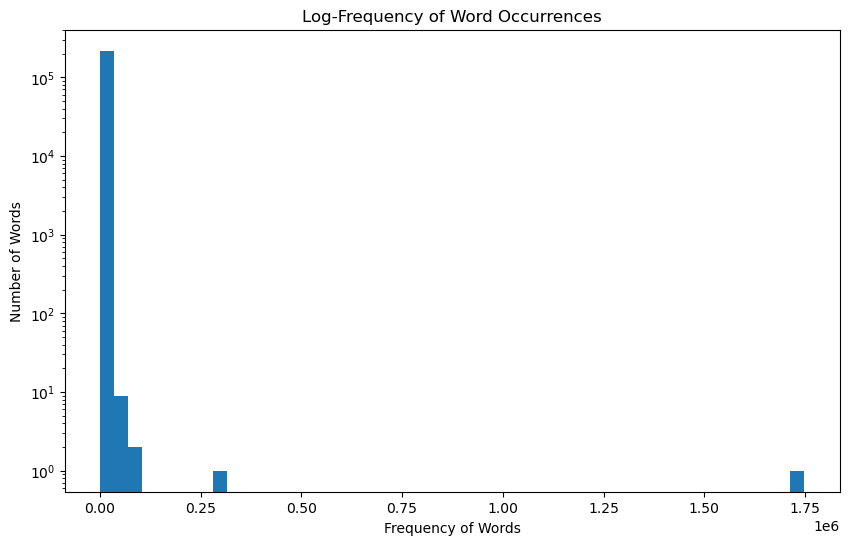

(0.24060737806251178, 0.7)

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(freq_df['Frequency'], bins=50, log=True)
plt.title('Log-Frequency of Word Occurrences')
plt.xlabel('Frequency of Words')
plt.ylabel('Number of Words')
plt.show()

# Setting min_df and max_df based on the plot and the dataframe information
min_df = freq_df['Frequency'][freq_df['Frequency'] > 5].count() / len(freq_df)
max_df = 0.7  # As an example, to exclude very common words
min_df,max_df

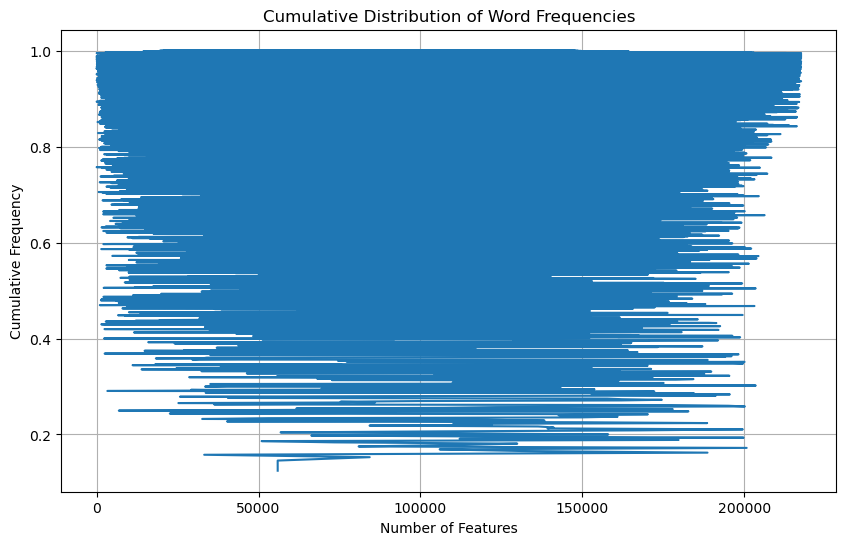

156219

In [102]:
# Calculate cumulative distribution of word frequencies
freq_df['cumulative'] = freq_df['Frequency'].cumsum() / freq_df['Frequency'].sum()

# Plot to see the point where additional words add little value
plt.figure(figsize=(10, 6))
plt.plot(freq_df['cumulative'])
plt.title('Cumulative Distribution of Word Frequencies')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

# Select max_features based on where the curve starts to plateau
max_features = freq_df[freq_df['cumulative'] > 0.95].index[0]
max_features

In [136]:
tfid = TfidfVectorizer(max_features = 156219, min_df=0.24,max_df=0.7)
tfid.fit(df_trec_06_07_combined['cleaned_text'])

TfidfVectorizer(max_df=0.7, max_features=156219, min_df=0.24)

In [142]:
# set x and y
X_trec_combined = tfid.transform(df_trec_06_07_combined['cleaned_text']).toarray()
y_trec_combined = df_trec_06_07_combined['label'].values
X_trec_combined,y_trec_combined

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.37631205, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.62630158, 0.        , 0.        , ..., 0.        , 0.        ,
         0.63349633],
        ...,
        [0.        , 0.        , 0.        , ..., 0.3716436 , 0.        ,
         0.1189306 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([1, 0, 1, ..., 1, 0, 0]))

### Training the Baseline Model(NB, RF)

In [143]:
# SPliting data
X_train_trec_combined, X_test_trec_combined, y_train_trec_combined, y_test_trec_combined = train_test_split(X_trec_combined,y_trec_combined,test_size = 0.2, random_state = 42)
X_trec_combined

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.37631205, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62630158, 0.        , 0.        , ..., 0.        , 0.        ,
        0.63349633],
       ...,
       [0.        , 0.        , 0.        , ..., 0.3716436 , 0.        ,
        0.1189306 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [165]:
knc_v3 = KNeighborsClassifier()
mnb_v3 = MultinomialNB(alpha=0.01)
dtc_v3 = DecisionTreeClassifier(max_depth = 5)
lrc_v3 = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc_v3 = RandomForestClassifier(n_estimators = 50, random_state = 42 )    
xgb_v3  = XGBClassifier(n_estimators = 50, random_state = 42)
clfs_v3 = {
    'KNN': knc_v3,
    'NB' : mnb_v3,
    'DT': dtc_v3,
    'LR': lrc_v3,
    'RF': rfc_v3,
    'xgb': xgb_v3
    }    


In [166]:
accuracy_scores = []
precision_scores = []
training_times = []

for name , clfs in clfs_v3.items():
    current_accuracy, current_precision, elapsed_time = train_classifier(clfs, X_train_trec_combined, y_train_trec_combined, X_test_trec_combined, y_test_trec_combined)
    print()
    print("For: ", name)
    print("Accuracy: ", current_accuracy)
    print("Precision: ", current_precision)
    print("Training Time (seconds):", elapsed_time)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    training_times.append(elapsed_time)


For:  KNN
Accuracy:  0.8148069878839109
Precision:  0.7782388795227597
Training Time (seconds): 0.9073431491851807

For:  NB
Accuracy:  0.672654268808115
Precision:  0.6788918621123878
Training Time (seconds): 0.017560243606567383

For:  DT
Accuracy:  0.775993237531699
Precision:  0.7416020671834626
Training Time (seconds): 0.08196616172790527

For:  LR
Accuracy:  0.7565511411665258
Precision:  0.7336120852441327
Training Time (seconds): 0.056524038314819336

For:  RF
Accuracy:  0.8300929839391378
Precision:  0.7975184794086589
Training Time (seconds): 1.604612112045288

For:  xgb
Accuracy:  0.8267117497886729
Precision:  0.794661733615222
Training Time (seconds): 0.08616900444030762


In [167]:
df_test

,label,text,transformed_text
0,0,hello in the license header of a source file b...,hello licens header sourc file licens gpl must...
1,1,and pensive by turns lost his appetite neglect...,pensiv turn lost appetit neglect dress devot m...
2,1,symbol alert http sescapenumber bilder hosting...,symbol alert http sescapenumb bilder host de i...
3,0,the internet patrol internet safety windows up...,internet patrol internet safeti window updat i...
4,0,escapenumberfxml version escapenumberd escape...,escapenumberfxml version escapenumberd escapen...
...,...,...,...
5122,1,summer bees were sayingthat this mud draws on ...,summer bee sayingthat mud draw stone hand free...
5123,1,gentile cliente di banca rasbank il servizio t...,gentil client di banca rasbank il servizio tec...
5124,0,on mon escapenumber escapenumber escapenumber ...,mon escapenumb escapenumb escapenumb escapenum...
5125,1,trading escapelong for you special situation a...,trade escapelong special situat alert tmxo tri...


In [168]:
X_test = tfid.transform(df_test['transformed_text'])

In [169]:
# NB
y_pred_test = mnb_v3.predict(X_test)
print(f"NB:{accuracy_score(y_test, y_pred_test)}")
clfs_v3 = {
    'KNN': knc_v3,
    'NB' : mnb_v3,
    'DT': dtc_v3,
    'LR': lrc_v3,
    'RF': rfc_v3,
    'xgb': xgb_v3
    }    

NB:0.6666666666666666


In [174]:
# DT
y_pred_test = dtc_v3.predict(X_test)
print(f"DT:{accuracy_score(y_test, y_pred_test)}")

DT:0.8010532475131656


In [175]:
# LR
y_pred_test = lrc_v3.predict(X_test)
print(f"LR:{accuracy_score(y_test, y_pred_test)}")

LR:0.7612638970157987


In [176]:
# XGB
y_pred_test = xgb_v3.predict(X_test)
print(f"XGB:{accuracy_score(y_test, y_pred_test)}")

XGB:0.6422859371952409


In [170]:
# RF
y_pred_test = rfc_v3.predict(X_test)
print(f"RF:{accuracy_score(y_test, y_pred_test)}")

RF:0.8732202067485859


### Hyperparameter Tuning:

Because my dataset consists over 70,000 emails, on a large dataset like this, hyperparameter Tuning can be very computationally expensive, because of the nature of Random Forest, the default setting will be enough. This part will only dedicate on Naive Bayes.

In [158]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid_nb = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 50.0]
}

# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Set up the grid search with cross-validation
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid_nb, cv=5, verbose=2, n_jobs=-1)
grid_search_nb.fit(X_train_trec_combined, y_train_trec_combined) 

# Best parameters found
print("Best parameters:", grid_search_nb.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'alpha': 0.01}


Now our model is performing much better on the unseen data with additional feature extraction settings in TF-IDF process. We want further feature engineering to optimize the model's performance.

### Feature Engineering:

Count of Special Characters: Spam emails often contain an unusually high number of special characters, such as exclamation marks or dollar signs.

In [180]:
df_trec_combined_text = pd.concat([df_trec_2007['text'], df_trec_06['text']], ignore_index=True)
df_trec_combined_text

0        do you feel the pressure to perform and not ri...
1        hi i've just updated from the gulus and i chec...
2        mega authenticv i a g r a discount pricec i a ...
3        hey billy it was really fun going out the othe...
4        system of the home it will have the capabiliti...
                               ...                        
70972    ch in a gold cor p symbol c gd c current price...
70973     begin pgp signed message hash shaescapenumber...
70974    lucky draw global lotto promotions head office...
70975    i am running a script which plays a series of ...
70976    yeah a number of people over the years have ha...
Name: text, Length: 70977, dtype: object

In [183]:
import numpy as np

def count_special_chars(text):
    
    special_chars = set("!@#$%^&*()_+-=[]{}|;:',.<>?")
    return sum(1 for char in text if char in special_chars)

# Apply this function to dataframe to create a new feature column
df_trec_06_07_combined['special_chars'] = df_trec_combined_text.apply(count_special_chars)
df_trec_06_07_combined

,cleaned_text,label,special_chars
0,feel pressur perform rise occas tri v ia gr an...,1,0
1,hi updat gulu check mirror seem littl typo deb...,0,1
2,mega authenticv g r discount pricec l discount...,1,0
3,hey billi realli fun go night talk said felt i...,1,1
4,system home capabl link far know within part r...,1,6
...,...,...,...
70972,ch gold cor p symbol c gd c current price esca...,1,6
70973,begin pgp sign messag hash shaescapenumb vulne...,0,0
70974,lucki draw global lotto promot head offic esca...,1,0
70975,run script play seri short sound file file pla...,0,0


### Implementing on Random Forest

In [201]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Setup preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', tfid, 'cleaned_text'),
        ('num', StandardScaler(), ['special_chars'])
    ])

# Apply preprocessing to create a transformed feature matrix
X = preprocessor.fit_transform(df_trec_06_07_combined)
y = df_trec_06_07_combined['label'].values

# Splitting the data
X_train_trec_combined, X_test_trec_combined, y_train_trec_combined, y_test_trec_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [198]:
print("Shape of X_train:", X_train_trec_combined.shape)
print("Shape of X_test:", X_test_trec_combined.shape)


Shape of X_train: (56781, 12)
Shape of X_test: (14196, 12)


In [199]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Example model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_trec_combined, y_train_trec_combined)

# Prediction and evaluation
y_pred = model.predict(X_test_trec_combined)
print("Accuracy:", accuracy_score(y_test_trec_combined, y_pred))


Accuracy: 0.8364327979712595


In [195]:
model

RandomForestClassifier(random_state=42)

In [229]:
df_test['special_chars'] = df_test['text'].apply(count_special_chars)
df_test.rename(columns={'transformed_text': 'cleaned_text'}, inplace=True)
df_test

,label,text,cleaned_text,special_chars
0,0,hello in the license header of a source file b...,hello licens header sourc file licens gpl must...,0
1,1,and pensive by turns lost his appetite neglect...,pensiv turn lost appetit neglect dress devot m...,10
2,1,symbol alert http sescapenumber bilder hosting...,symbol alert http sescapenumb bilder host de i...,0
3,0,the internet patrol internet safety windows up...,internet patrol internet safeti window updat i...,3
4,0,escapenumberfxml version escapenumberd escape...,escapenumberfxml version escapenumberd escapen...,0
...,...,...,...,...
5122,1,summer bees were sayingthat this mud draws on ...,summer bee sayingthat mud draw stone hand free...,1
5123,1,gentile cliente di banca rasbank il servizio t...,gentil client di banca rasbank il servizio tec...,0
5124,0,on mon escapenumber escapenumber escapenumber ...,mon escapenumb escapenumb escapenumb escapenum...,6
5125,1,trading escapelong for you special situation a...,trade escapelong special situat alert tmxo tri...,0


In [209]:
# Transform the new test data using the pre-existing preprocessor
X_new_test = preprocessor.transform(df_test)
y_new_test = df_test['label'].values

In [211]:
# Predict using the already trained model
y_pred_new_test = model.predict(X_new_test)

# Evaluate the performance
print("Random Forest Accuracy on new test data:", accuracy_score(y_new_test, y_pred_new_test))


Random Forest Accuracy on new test data: 0.8946752486834406


### Naive Bayes

Since Naive Bayes is not mean to handle negative values, the standardScaler we used above often results in negative values, below we will switch to MinMaxScaler to ensure non-negative feature values.

In [225]:
from sklearn.preprocessing import MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', tfid, 'cleaned_text'),
        ('num', MinMaxScaler(), ['special_chars'])
    ])

# Apply preprocessing to create a transformed feature matrix
X = preprocessor.fit_transform(df_trec_06_07_combined)
y = df_trec_06_07_combined['label'].values

# Splitting the data
X_train_trec_combined, X_test_trec_combined, y_train_trec_combined, y_test_trec_combined = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Configure the Naive Bayes model
model = MultinomialNB(alpha=0.01)
model.fit(X_train_trec_combined, y_train_trec_combined)

# Prediction and evaluation
y_pred = model.predict(X_test_trec_combined)
print("Accuracy with Naive Bayes:", accuracy_score(y_test_trec_combined, y_pred))

Accuracy with Naive Bayes: 0.6727951535643844


In [226]:
# Predict using the already trained model
y_pred_new_test = model.predict(X_new_test)

# Evaluate the performance
print("Naive Bayes Accuracy on new test data:", accuracy_score(y_new_test, y_pred_new_test))

Naive Bayes Accuracy on new test data: 0.7778427930563683


From the new results we can see how adding the special character feature improved both model with a better improvement on Naive Bayes model. WE will add more feature to see it models can be further improved.

### Adding one more feature(Sentiment)

Adding a sentiment score as a feature can provide valuable insights into the emotional tone of the text, which might be characteristic of either spam or non-spam emails. For instance, spam emails might exhibit overly positive sentiments with promises of rewards or benefits, or they might convey a sense of urgency that could manifest as a negative sentiment. Textblob from NLTK libarary will be use. Polarity is a float within the range [-1.0, 1.0], where -1.0 is very negative, and 1.0 is very positive.




In [232]:
pip install textblob

  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/02/07/5fd2945356dd839974d3a25de8a142dc37293c21315729a41e775b5f3569/textblob-0.18.0.post0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 10.9 MB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [234]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    # Returns the polarity of the text
    return TextBlob(text).sentiment.polarity

In [239]:
# Applying the function to your dataframe
df_trec_06_07_combined['sentiment_polarity'] = df_trec_06_07_combined['text'].apply(get_sentiment)

In [240]:
df_trec_06_07_combined

,cleaned_text,label,special_chars,text,sentiment_polarity
0,feel pressur perform rise occas tri v ia gr an...,1,0,do you feel the pressure to perform and not ri...,-0.050000
1,hi updat gulu check mirror seem littl typo deb...,0,1,hi i've just updated from the gulus and i chec...,-0.135833
2,mega authenticv g r discount pricec l discount...,1,0,mega authenticv i a g r a discount pricec i a ...,0.000000
3,hey billi realli fun go night talk said felt i...,1,1,hey billy it was really fun going out the othe...,0.101923
4,system home capabl link far know within part r...,1,6,system of the home it will have the capabiliti...,0.095893
...,...,...,...,...,...
70972,ch gold cor p symbol c gd c current price esca...,1,6,ch in a gold cor p symbol c gd c current price...,0.137129
70973,begin pgp sign messag hash shaescapenumb vulne...,0,0,begin pgp signed message hash shaescapenumber...,0.268182
70974,lucki draw global lotto promot head offic esca...,1,0,lucky draw global lotto promotions head office...,0.102778
70975,run script play seri short sound file file pla...,0,0,i am running a script which plays a series of ...,0.169231


In [252]:
import joblib
# Define the preprocessor as a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', tfid, 'cleaned_text'),
        ('num', MinMaxScaler(), ['special_chars']),
        ('sent', 'passthrough', ['sentiment_polarity'])  # Pass through sentiment scores without scaling
    ])

# Creating a complete pipeline with preprocessing and classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Assuming df is your DataFrame with features and labels
X = df_trec_06_07_combined.drop('label', axis=1)
y = df_trec_06_07_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import accuracy_score
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Save the pipeline to disk
joblib.dump(pipeline, 'rf_pipeline.pkl')

Accuracy: 0.8470695970695971


['rf_pipeline.pkl']

We can see this improved the Random Forest's performance from 0.8364327979712595 to 0.8470695970695971.

### Naive Bayes

I will now add this feature to Naive Bayes. Since Naive Bayes handles negative scores prooly, according adjustment will be made.transforming the range from 
[−1,1] to [0,2]. This method preserves the relative differences between scores.

In [244]:
# Function to adjust sentiment scores
def adjust_sentiment(score):
    return score + 1

# Applying the adjustment
df_trec_06_07_combined['adjusted_sentiment'] = df_trec_06_07_combined['sentiment_polarity'].apply(adjust_sentiment)


In [245]:
df_trec_06_07_combined

,cleaned_text,label,special_chars,text,sentiment_polarity,adjusted_sentiment
0,feel pressur perform rise occas tri v ia gr an...,1,0,do you feel the pressure to perform and not ri...,-0.050000,0.950000
1,hi updat gulu check mirror seem littl typo deb...,0,1,hi i've just updated from the gulus and i chec...,-0.135833,0.864167
2,mega authenticv g r discount pricec l discount...,1,0,mega authenticv i a g r a discount pricec i a ...,0.000000,1.000000
3,hey billi realli fun go night talk said felt i...,1,1,hey billy it was really fun going out the othe...,0.101923,1.101923
4,system home capabl link far know within part r...,1,6,system of the home it will have the capabiliti...,0.095893,1.095893
...,...,...,...,...,...,...
70972,ch gold cor p symbol c gd c current price esca...,1,6,ch in a gold cor p symbol c gd c current price...,0.137129,1.137129
70973,begin pgp sign messag hash shaescapenumb vulne...,0,0,begin pgp signed message hash shaescapenumber...,0.268182,1.268182
70974,lucki draw global lotto promot head offic esca...,1,0,lucky draw global lotto promotions head office...,0.102778,1.102778
70975,run script play seri short sound file file pla...,0,0,i am running a script which plays a series of ...,0.169231,1.169231


In [253]:
# Define the preprocessor with adjusted sentiment
preprocessor = ColumnTransformer(
    transformers=[
        ('txt', tfid, 'cleaned_text'),   # Apply TF-IDF to text data
        ('num', MinMaxScaler(), ['special_chars']),    # Scale numeric features as needed
        ('sent', 'passthrough', ['adjusted_sentiment']) # Use the adjusted sentiment
    ])

# Creating the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', MultinomialNB(alpha=0.01))
])

# data setup and split
X = df_trec_06_07_combined.drop('label', axis=1)
y = df_trec_06_07_combined['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Naive Bayes: {accuracy:.2f}")

# Save the pipeline to disk
joblib.dump(pipeline, 'nb_pipeline.pkl')

Accuracy with Naive Bayes: 0.76


['nb_pipeline.pkl']

Naive Bayes' performance improved from 0.67 to 0.76.

### Testing on the test dataset

Now we will test both models on the unseen new dataset to check the how models generalize.

In [251]:
df_test['sentiment_polarity'] = df_test['text'].apply(get_sentiment)
df_test['adjusted_sentiment'] = df_test['sentiment_polarity'].apply(adjust_sentiment)
df_test

,label,text,cleaned_text,special_chars,sentiment_polarity,adjusted_sentiment
0,0,hello in the license header of a source file b...,hello licens header sourc file licens gpl must...,0,0.091667,1.091667
1,1,and pensive by turns lost his appetite neglect...,pensiv turn lost appetit neglect dress devot m...,10,0.051031,1.051031
2,1,symbol alert http sescapenumber bilder hosting...,symbol alert http sescapenumb bilder host de i...,0,0.000000,1.000000
3,0,the internet patrol internet safety windows up...,internet patrol internet safeti window updat i...,3,0.256111,1.256111
4,0,escapenumberfxml version escapenumberd escape...,escapenumberfxml version escapenumberd escapen...,0,0.152706,1.152706
...,...,...,...,...,...,...
5122,1,summer bees were sayingthat this mud draws on ...,summer bee sayingthat mud draw stone hand free...,1,0.128571,1.128571
5123,1,gentile cliente di banca rasbank il servizio t...,gentil client di banca rasbank il servizio tec...,0,0.416667,1.416667
5124,0,on mon escapenumber escapenumber escapenumber ...,mon escapenumb escapenumb escapenumb escapenum...,6,0.175982,1.175982
5125,1,trading escapelong for you special situation a...,trade escapelong special situat alert tmxo tri...,0,0.179683,1.179683


In [254]:
# Separate features and labels
X_new = df_test.drop('label', axis=1)
y_true = df_test['label']

In [255]:
# Load the pipelines
nb_pipeline = joblib.load('nb_pipeline.pkl')
rf_pipeline = joblib.load('rf_pipeline.pkl')

In [256]:
nb_predictions = nb_pipeline.predict(X_new)
rf_predictions = rf_pipeline.predict(X_new)


In [257]:
def evaluate_model(name, predictions, labels):
    accuracy = accuracy_score(labels, predictions)
    print(f"{name} - Accuracy: {accuracy:.2f}")

# Evaluate Naive Bayes model
evaluate_model("Naive Bayes", nb_predictions, y_true)

# Evaluate Random Forest model
evaluate_model("Random Forest", rf_predictions, y_true)


Naive Bayes - Accuracy: 0.78
Random Forest - Accuracy: 0.95


import zipfile

with zipfile.ZipFile('your_file.zip', 'w', compression=zipfile.ZIP_DEFLATED) as zip_file:
	zip_file.write('your_file.pkl')## Model Performance Evaluation

### Naive Bayes:

- **Before Update:** 
  - The Naive Bayes model achieved an accuracy of 0.78.
- **After Update:** 
  - The accuracy remains unchanged at 0.78.

### Random Forest:

- **Before Update:** 
  - Previously, the Random Forest model had an accuracy of 0.89.
- **After Update:** 
  - The model shows a significant improvement, with accuracy increasing to 0.95.

### Analysis:

The improvement in the Random Forest model's accuracy suggests that recent updates, possibly including adjustments in model parameters, feature engineering, or data preprocessing, have effectively enhanced its predictive capabilities. This increase could also be attributed to better handling of the model's complexity and its ability to learn more nuanced patterns in the data.

The stability in performance of the Naive Bayes model may require further investigation to identify potential areas for improvement, perhaps exploring alternative feature engineering techniques or model tuning strategies.
